<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ReadMe-File" data-toc-modified-id="ReadMe-File-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ReadMe File</a></span></li><li><span><a href="#Импорт-библиотек-и-получение-сырых-данных" data-toc-modified-id="Импорт-библиотек-и-получение-сырых-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек и получение сырых данных</a></span></li><li><span><a href="#Парсим-данные-со-ссылок" data-toc-modified-id="Парсим-данные-со-ссылок-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Парсим данные со ссылок</a></span><ul class="toc-item"><li><span><a href="#Достанем-все-ссылки" data-toc-modified-id="Достанем-все-ссылки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Достанем все ссылки</a></span></li><li><span><a href="#Парсим-со-ссылок" data-toc-modified-id="Парсим-со-ссылок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Парсим со ссылок</a></span></li></ul></li><li><span><a href="#Извлекаем-информацию-из-данных" data-toc-modified-id="Извлекаем-информацию-из-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Извлекаем информацию из данных</a></span><ul class="toc-item"><li><span><a href="#Кого-ищет-работодатель?-(DA,-DE,-DS,-Developer)-и-какой-grade?" data-toc-modified-id="Кого-ищет-работодатель?-(DA,-DE,-DS,-Developer)-и-какой-grade?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Кого ищет работодатель? (DA, DE, DS, Developer) и какой grade?</a></span></li><li><span><a href="#Выясним-готов-ли-работодатель-взять-студента-и-формат-работы-(гибрид-/-удалёнка-и-т.д)" data-toc-modified-id="Выясним-готов-ли-работодатель-взять-студента-и-формат-работы-(гибрид-/-удалёнка-и-т.д)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выясним готов ли работодатель взять студента и формат работы (гибрид / удалёнка и т.д)</a></span></li><li><span><a href="#Определим-города" data-toc-modified-id="Определим-города-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определим города</a></span></li><li><span><a href="#Вытащим-ЗП." data-toc-modified-id="Вытащим-ЗП.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вытащим ЗП.</a></span><ul class="toc-item"><li><span><a href="#Определим-валюту" data-toc-modified-id="Определим-валюту-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Определим валюту</a></span></li><li><span><a href="#Обработаем-каждую-валюту" data-toc-modified-id="Обработаем-каждую-валюту-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Обработаем каждую валюту</a></span></li></ul></li></ul></li><li><span><a href="#Что-мы-получили" data-toc-modified-id="Что-мы-получили-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Что мы получили</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Визуализация</a></span><ul class="toc-item"><li><span><a href="#Смотрим-на-динамику-показателей-во-времени" data-toc-modified-id="Смотрим-на-динамику-показателей-во-времени-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Смотрим на динамику показателей во времени</a></span></li><li><span><a href="#Смотрим-на-соотношения" data-toc-modified-id="Смотрим-на-соотношения-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Смотрим на соотношения</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Обработка-данных-для-дашборда" data-toc-modified-id="Обработка-данных-для-дашборда-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Обработка данных для дашборда</a></span></li></ul></div>

# Импорт библиотек и получение сырых данных

In [1]:
import pyrogram
import requests
import numpy as np
from bs4 import BeautifulSoup
from dotenv import load_dotenv
import os
from pyrogram import Client
import pandas as pd
import json
from datetime import datetime
import re
from IPython.core.display import display, HTML, clear_output
import ipywidgets as widgets

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pyrogram.__version__

'2.0.50'

**Перечислим телеграм - каналы с которых мы будем парсить данные**

https://t.me/datasciencejobs

https://t.me/bds_job

https://t.me/foranalysts

https://t.me/datajob

https://t.me/datajobschannel

https://t.me/biheadhunter

https://t.me/data_hr

https://t.me/analysts_hunter

Загрузим данные из telegram.csv

In [3]:
telegram = pd.read_csv('telegram.csv')

In [4]:
telegram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10514 entries, 0 to 10513
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chat        5525 non-null   object
 1   message_id  10514 non-null  int64 
 2   date        10514 non-null  object
 3   text        9851 non-null   object
 4   entities    5574 non-null   object
dtypes: int64(1), object(4)
memory usage: 410.8+ KB


Видим, что у нас есть пропуски. 

In [5]:
telegram.head(3)

,chat,message_id,date,text,entities
0,"{\n ""_"": ""Chat"",\n ""id"": -1001321264581,...",1115,2022-09-10 16:24:25,#вакансия #python #developer #remote \n\nPytho...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
1,"{\n ""_"": ""Chat"",\n ""id"": -1001321264581,...",1114,2022-09-09 10:02:44,⚡️🇫🇮3й Онлайн Job Fair 14 сентября с 13:00 по ...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
2,"{\n ""_"": ""Chat"",\n ""id"": -1001321264581,...",1113,2022-09-08 09:20:32,#fulltime #удаленка #вакансия #hadoop #java\n\...,"[\n {\n ""_"": ""MessageEntity"",\n ..."


In [6]:
telegram['chat'].nunique()
# всего мы парсили с 8 каналов, но уникальных 11

11

Посмотрим что мы можем достать из колонки с информацией о канале ('chat')

In [7]:
json.loads(telegram['chat'][1001])

{'_': 'Chat',
 'id': -1001321264581,
 'type': 'ChatType.CHANNEL',
 'is_verified': False,
 'is_restricted': False,
 'is_creator': False,
 'is_scam': False,
 'is_fake': False,
 'title': 'Data Science Jobs / AI / NN / ML / DL / NLP',
 'username': 'datasciencejobs',
 'photo': {'_': 'ChatPhoto',
  'small_file_id': 'AQADAgADrqcxG0_aIwwAEAIAAzsKmtwW____HffFAAFCxQABTgAEHgQ',
  'small_photo_unique_id': 'AgADrqcxG0_aIww',
  'big_file_id': 'AQADAgADrqcxG0_aIwwAEAMAAzsKmtwW____HffFAAFCxQABTgAEHgQ',
  'big_photo_unique_id': 'AgADrqcxG0_aIww'},
 'dc_id': 2,
 'has_protected_content': False}

Выгрузим id канала и его название в отдельные колонки

In [8]:
def get_chat_id(x):
    try:
        return json.loads(x)['id']
    except: 
        return 0
    
def get_chat_name(x):
    try:
        return json.loads(x)['title']
    except: 
        return 0
    
def get_username(x):
    try:
        return json.loads(x)['username']
    except: 
        return 0

In [9]:
telegram['chat_id'] = telegram['chat'].apply(lambda x: get_chat_id(x))
telegram['chat_name'] = telegram['chat'].apply(lambda x: get_chat_name(x))
telegram['username'] = telegram['chat'].apply(lambda x: get_username(x))

In [10]:
telegram['chat_id'].value_counts()

 0                4989
-1001269377842    1537
-1001321264581    1052
-1001137236002     859
-1001164864072     732
-1001291755040     575
-1001483488834     467
-1001269328727     292
-1001658004745       6
-1001649639518       2
-1001564682931       2
-1001260335033       1
Name: chat_id, dtype: int64

In [11]:
telegram['username'].value_counts()

0                         4989
datajobschannel           1537
datasciencejobs           1052
foranalysts                859
bds_job                    732
biheadhunter               575
datajob                    467
data_hr                    292
maksik_life                  6
lanit_in_search              2
ccfghnjjvcdddfvjkko          2
matemarketing_official       1
Name: username, dtype: int64

Видим что при ограничении в 5000 сообщений, 4989 сообщений с какого то канала не получили chat_id.

Также появились псевдо - каналы (lanit_in_search, ccfghnjjvcdddfvjkko и тп), это сообщения от участников, удалим их. 

In [12]:
bad_ch = ['maksik_life', 'ccfghnjjvcdddfvjkko', 'lanit_in_search', 'matemarketing_official']
telegram_with_bad_ch = telegram.copy()
telegram = telegram[~telegram['username'].isin(bad_ch)]
telegram['username'].value_counts()

0                  4989
datajobschannel    1537
datasciencejobs    1052
foranalysts         859
bds_job             732
biheadhunter        575
datajob             467
data_hr             292
Name: username, dtype: int64

Методом исключения получаем, что 0 заполнились данные с каналов analysts_hunter (Работа ищет аналитиков // Вакансии с 🔌)

Проставим эти данные вручную (analysts_hunter и Работа ищет аналитиков)

In [13]:
telegram.loc[telegram.chat_id == 0, 'chat_name'] = 'Работа ищет аналитиков'
telegram.loc[telegram.chat_id == 0, 'username'] = 'analysts_hunter'

# сразу приведём дату к нужному типу данных
telegram['date'] = pd.to_datetime(telegram['date'])

Найдём долю пропусков в колонке text  в каждом канале.

In [14]:
telegram.drop('username', axis = 1).isna().groupby(telegram['username'])['text'].sum() / telegram['username'].value_counts()

analysts_hunter    0.040088
bds_job            0.030055
biheadhunter       0.078261
data_hr            0.119863
datajob            0.169165
datajobschannel    0.024073
datasciencejobs    0.220532
foranalysts        0.015134
dtype: float64

Проверим на дубликаты и приведём текст вакансии к нижнему регистру

In [15]:
telegram.duplicated().sum()

0

In [16]:
telegram['text'] = telegram['text'].apply(lambda x : str(x).lower())
telegram = telegram.reset_index(drop=True)

In [17]:
print(telegram['entities'][2])

[
    {
        "_": "MessageEntity",
        "type": "MessageEntityType.HASHTAG",
        "offset": 0,
        "length": 9
    },
    {
        "_": "MessageEntity",
        "type": "MessageEntityType.HASHTAG",
        "offset": 10,
        "length": 9
    },
    {
        "_": "MessageEntity",
        "type": "MessageEntityType.HASHTAG",
        "offset": 20,
        "length": 9
    },
    {
        "_": "MessageEntity",
        "type": "MessageEntityType.HASHTAG",
        "offset": 30,
        "length": 7
    },
    {
        "_": "MessageEntity",
        "type": "MessageEntityType.HASHTAG",
        "offset": 38,
        "length": 5
    },
    {
        "_": "MessageEntity",
        "type": "MessageEntityType.BOLD",
        "offset": 45,
        "length": 140
    },
    {
        "_": "MessageEntity",
        "type": "MessageEntityType.BOLD",
        "offset": 416,
        "length": 25
    },
    {
        "_": "MessageEntity",
        "type": "MessageEntityType.BOLD",
        "offs

# Парсим данные со ссылок
## Достанем все ссылки

In [18]:
# маска для парсинга ссылок
regexp = 'http\S+'

In [19]:
def get_links(x, regexp = regexp):
    try:
        for i in json.loads(x['entities']):
            if i['type'] == 'MessageEntityType.TEXT_LINK':
                return i['url']
            
            else:
                url = re.findall(regexp, x['text'])[0] 
                return url
            
        
    except:
        return None

In [20]:
telegram['url'] = telegram.apply(get_links, axis = 1)

## Парсим со ссылок

In [21]:
def parse_site(url, element = 'div', extra_info = None):
    try:
        data = requests.get(url).text
        soup = BeautifulSoup(data)
        elements = []
        for extra in extra_info:
            elements += soup.find_all(element, extra)
        html = ''
        for i in elements:
            html += str(i)
        return html
    except Exception as e:
        return '<p>no info found</p>'

Нам нужно для каждого сайта найти тег / класс,  котором хранится нужный блок страницы - вакансии.

Например, для сайта proglib :
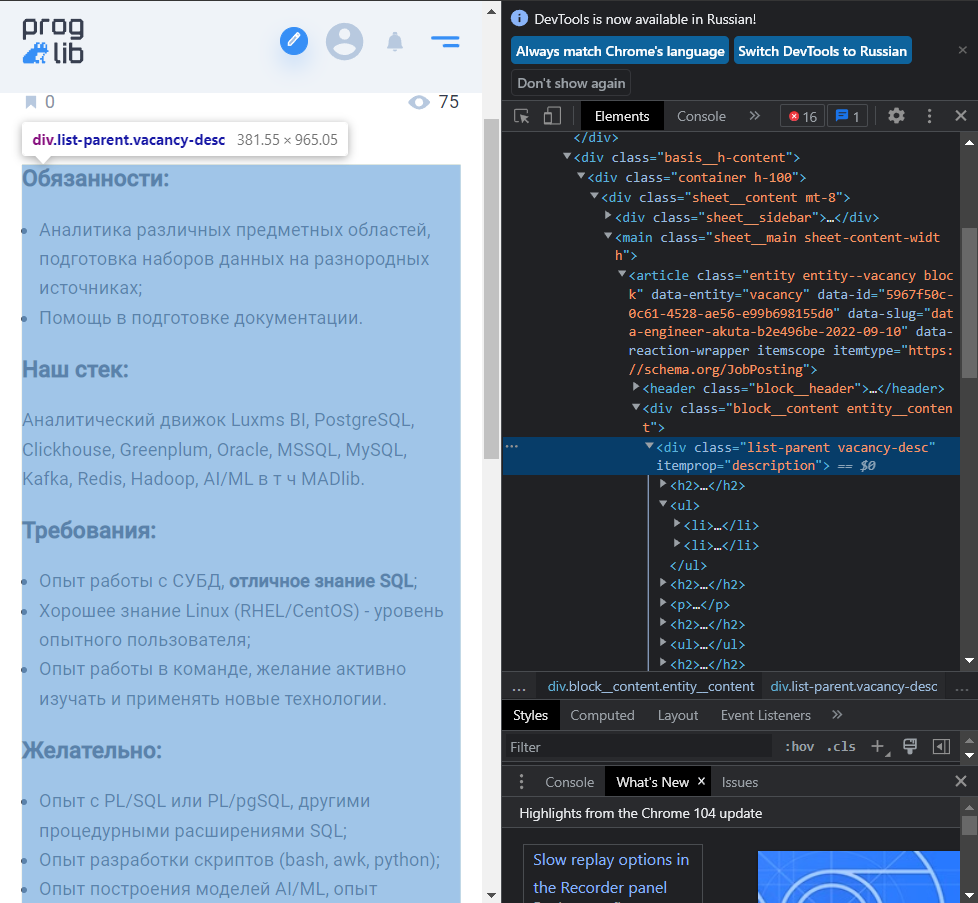

это будет класс 'list-parent vacancy-desc' с тегом div


Тк каждый сайт имеет свою структуру, то я вручную просмотрела ссылки которые удалось спарсить и обозначила нужные параметры для самых часто встречающихся.



In [22]:
extra_infos = [{'class' : 'list-parent vacancy-desc'}, # proglib
               {'class' : 'vacancy-description'}, ## hh.ru
               {'class' : 'lc-jobs-vacancy__description'}, # yandex
               {'class':'vacancy_vacancyInfo__27MOq'}, # aliftech
               {'class':'lc-group__content lc-group__content_justify_start lc-group__content_viewport lc-screen lpc-section'}, # practicum.yandex
               {'class' : 'wrapper1'}, # https://data.analyst.elama.team/
               {'class' : 'container b-vacancy-v2'}, # getmatch.ru
               {'class': 'job-page__text job-page__text_min-height'}, # profi.ru
               {'itemprop' : 'description'}, # rabota.ru
               {'class' : 'col-main entry-content'},# te-st.ru
               {'class' : 'vacancy-section'}, # hh.ru        
               {'class' : 'bloko-columns-row'}
               
              ]

Отберём данные с начала 2022 года

In [23]:
telegram_date = telegram[telegram['date'] >= '2022-01-01']
parsed_text_from_link_list =  telegram_date['url'].apply(lambda x : parse_site(x, extra_info=extra_infos))
telegram_date['parsed_text_from_link'] = parsed_text_from_link_list

<ipython-input-23-03521efd0f5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram_date['parsed_text_from_link'] = parsed_text_from_link_list


In [24]:
telegram = telegram_date

In [67]:
len(telegram[(telegram['parsed_text_from_link'] != '<p>no info found</p>') & (telegram['parsed_text_from_link'] != '')])

13

In [64]:
telegram

,chat,message_id,date,text,entities,chat_id,chat_name,username,url,parsed_text_from_link,...,Псков,Саратов,clean_text,salary,eur,dol,rub,hour_rate,month,week_of_year
0,"{\n ""_"": ""Chat"",\n ""id"": -1001321264581,...",1115,2022-09-10 16:24:25,#вакансия #python #developer #remote \n\npytho...,"[\n {\n ""_"": ""MessageEntity"",\n ...",-1001321264581,Data Science Jobs / AI / NN / ML / DL / NLP,datasciencejobs,None,<p>no info found</p>,...,False,False,#вакансия #python #developer #remote \n\npytho...,3500.00,False,True,False,True,9,36
1,"{\n ""_"": ""Chat"",\n ""id"": -1001321264581,...",1114,2022-09-09 10:02:44,⚡️🇫🇮3й онлайн job fair 14 сентября с 13:00 по ...,"[\n {\n ""_"": ""MessageEntity"",\n ...",-1001321264581,Data Science Jobs / AI / NN / ML / DL / NLP,datasciencejobs,None,<p>no info found</p>,...,False,False,⚡️🇫🇮3й онлайн job fair ября с по мск от nerds...,-1.00,False,False,False,False,9,36
2,"{\n ""_"": ""Chat"",\n ""id"": -1001321264581,...",1113,2022-09-08 09:20:32,#fulltime #удаленка #вакансия #hadoop #java\n\...,"[\n {\n ""_"": ""MessageEntity"",\n ...",-1001321264581,Data Science Jobs / AI / NN / ML / DL / NLP,datasciencejobs,None,<p>no info found</p>,...,False,False,#fulltime #удаленка #вакансия #hadoop #java\n\...,300000.00,False,False,True,False,9,36
3,"{\n ""_"": ""Chat"",\n ""id"": -1001321264581,...",1112,2022-09-07 09:20:50,#vacancy #relocation #yerevan #computervision ...,"[\n {\n ""_"": ""MessageEntity"",\n ...",-1001321264581,Data Science Jobs / AI / NN / ML / DL / NLP,datasciencejobs,None,<p>no info found</p>,...,False,False,#vacancy #relocation #yerevan #computervision ...,3750.75,False,True,False,True,9,36
4,"{\n ""_"": ""Chat"",\n ""id"": -1001321264581,...",1111,2022-09-06 20:39:43,"коллеги, только что на ph запустились наши дру...","[\n {\n ""_"": ""MessageEntity"",\n ...",-1001321264581,Data Science Jobs / AI / NN / ML / DL / NLP,datasciencejobs,https://www.producthunt.com/posts/eyrene,,...,False,False,"коллеги, только что на ph запустились наши дру...",-1.00,False,False,False,False,9,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,NaN,181316,2022-08-15 23:17:46,"мы наоборот, добрые и пушистые 🤣🤣🤣 валить студ...",NaN,0,Работа ищет аналитиков,analysts_hunter,None,<p>no info found</p>,...,False,False,"мы наоборот, добрые и пушистые 🤣🤣🤣 валить студ...",-1.00,False,False,False,False,8,33
10499,NaN,181315,2022-08-15 23:17:31,"чем больше ошибок найдёт ревьюер, тем меньше о...",NaN,0,Работа ищет аналитиков,analysts_hunter,None,<p>no info found</p>,...,False,False,"чем больше ошибок найдёт ревьюер, тем меньше о...",-1.00,False,False,False,False,8,33
10500,NaN,181314,2022-08-15 23:16:32,я всё больше боюсь старта своего потока),NaN,0,Работа ищет аналитиков,analysts_hunter,None,<p>no info found</p>,...,False,False,я всё больше боюсь старта своего потока) no i...,-1.00,False,False,False,False,8,33
10501,NaN,181313,2022-08-15 23:16:17,"спасибо! мб станется, на других проектах перес...",NaN,0,Работа ищет аналитиков,analysts_hunter,None,<p>no info found</p>,...,False,False,"спасибо! мб станется, на других проектах перес...",-1.00,False,False,False,False,8,33


# Извлекаем информацию из данных

Создадим маски для поиска через регулярные выражения, что будем искать :

## Кого ищет работодатель? (DA, DE, DS, Developer) и какой grade?
* Определим кого ищет работодатель, создадим колонки da / de / ds / dvlp со значениями TRUE / FALSE
* Определим грейд (junior и тп)


In [25]:
ds = r'data scientist|ds|tensorflow|pytorch|ml|networks|саентист'
da = r'analyst|analysis|аналитик|business intelligence|биай|tableau|анализ|da|bi'
de = r'engineer|инженер|spark|airflow|de|dwh|etl|architect|архитектор'
dvlp = r'разработчик|developer'

intern = r'intern|стажер|стажёр|стажировка'
junior = r'junior|джун'
middle = r'middle|миддл|мидл'
senior = r'senior|сеньор|синьор'
lead = r'lead|headof|head of|head|лид|ведущ'


In [26]:
def get_info_tf(pattern, data):
    return data[['text', 'parsed_text_from_link']].apply(lambda x :\
     True if ( re.search(pattern, x['text']) or re.search(pattern, x['parsed_text_from_link']) ) else False, axis = 1) 
    

In [27]:
telegram.loc[:, 'intern'] = get_info_tf(intern, telegram)
telegram.loc[:, 'junior'] = get_info_tf(junior, telegram)
telegram.loc[:, 'middle'] = get_info_tf(middle, telegram)
telegram.loc[:, 'senior'] = get_info_tf(senior, telegram)


telegram.loc[:, 'da'] = get_info_tf(da, telegram)
telegram.loc[:, 'ds'] = get_info_tf(ds, telegram)
telegram.loc[:, 'de'] = get_info_tf(de, telegram)
telegram.loc[:, 'dvlp'] = get_info_tf(dvlp, telegram)

## Выясним готов ли работодатель взять студента и формат работы (гибрид / удалёнка и т.д)

In [28]:
# создадим регулярки для поиска, готов ли работодатель взять студента / недавнего выпускника
# режим работы
# предлагает ли работодатель релокацию
import warnings
warnings.filterwarnings("ignore")

is_student = r'студент|выпускник|вуз|мфти|мгу|вшэ|вышка|бакалавр|специалитет'
work_style_online = r'онлайн|удалён|удален|remote'
work_style_off = r'офис|оффлайн'
work_style_both = r'гибрид|гибкий'
relocation = r'релокац|переезд|relocation'

telegram['is_student'] = get_info_tf(is_student, telegram)
telegram['work_style_online'] = get_info_tf(work_style_online, telegram)
telegram['work_style_off'] = get_info_tf(work_style_off, telegram)
telegram['work_style_both'] = get_info_tf(work_style_both, telegram)
telegram['relocation'] = get_info_tf(relocation, telegram)


# для вакансий, для которых мы определили что можно и в офисе и удалённо проставим, что это гибрид

telegram[~telegram['work_style_both']]['work_style_both'] = telegram[~telegram['work_style_both']].apply(lambda x : \
                                            True if (x['work_style_off'] & x['work_style_online']) else False, axis = 1)


Есть удобная кнопка через которую можно смотреть на вакансии

In [29]:
button = widgets.Button(description="Показать")
output = widgets.Output()

display(button, output)

counter = 0
def on_clicked(b):
    with output:
        try:
            global counter
            clear_output()
            print('№ вакансии: ', counter)
            print(telegram['text'][counter])
            counter += 1
        except Exception as e:
            print("Вакансии закончились")
            
button.on_click(on_clicked)

Button(description='Показать', style=ButtonStyle())

Output()

## Определим города 

In [30]:
russia_cities = {
    'Москва': ['moscow', 'москв[аеы]', 'мск'],
    'Санкт-Петербург': ['saint\Wpetersburg', 'санкт-петербург[ае]?', 'питер[ае]?', 'спб'],
    'Казань': ['\Wkazan\W', '\Wказан[ьи]'],
    'Сочи': ['sochi', 'сочи', 'адлер'],
    'Ростов': ['rostov', 'ростов[ае]?'],
    'Калининград': ['kaliningrad', 'калининград[ае]?'],
    'Самара': ['samara', 'самар[аеы]'],
    'Екатеринбург': ['y?ekaterinburg', 'екатеринбург[ае]?'],
    'Нижний Новгород': ['nizhni?y\Wnovgorod', 'нижн(ий|ем|его) новгород[еа]?'],
    'Краснодар': ['krasnodar', 'краснодаре?'],
    'Иркутск': ['irkutsk', 'иркутск[еа]?'],
    'Ярославль': ['yaroslavl', 'ярославл[ьея]'],
    'Владивосток': ['vladivostok', 'владивосток[ае]?'],
    'Воронеж': ['voronezh', 'воронеж[ае]?'],
    'Петрозаводск': ['petrozavodsk', 'петрозаводск[ае]?'],
    'Тюмень': ['tyumen', 'тюмен[еиь]'],
    'Уфа': ['ufa', '\Wуф[аеы]'],
    'Красноярск': ['krasnoyarsk', 'красноярск[ае]?'],
    'Волгоград': ['volgograd', 'волгоград[ае]?'],
    'Новосибирск': ['novosibirsk', 'новосибирск[ае]?'],
    'Новороссийск': ['novorossiysk', 'новороссийск[ае]?'],
    'Великий Новгород': ['veliki?y?\Wnovgorod', 'велик(ий|ом|ого) новгород[ае]?'],
    'Псков': ['pskov', 'псков[ае]?'],
    'Саратов': ['saratov', 'саратов[ае]?'],
}


for key, item in russia_cities.items():
    regexpr_city = '|'.join(russia_cities[key])
    telegram[key] = get_info_tf(regexpr_city, telegram)


## Вытащим ЗП.

Сначала почиситим текст от других цифр :

* номер телефона

* сайты 

* почты

* дата / время

In [31]:
# составим регулярку для отбора номера телефона
phone_number_regexp = r'([\+]?[78][ \-\(]*\d{3}[ \)\-]*\d{3}[ \-\(]*\d{2}[ \-\(]*\d{2})'
# для ссылок
link_regexp = r'<.*?>'
# регулярка для даты формата YYYY-MM-DD и DD-MM-YYYY (также подойдёт YYYY.MM.DD и DD.MM.YYYY)
date_regexp = r'(\d{4}[\.\- ]*\d{2}[\.\- ]*\d{2})|(\d{2}[\.\- ]*\d{2}[\.\- ]*\d{4})'

# регулярка для времени (найдёт <<13:00>>, <<13-00>>, <<17 - 00>>, <<15 : 45>>, при условии что перед ними не было чисел)
time_regexp = r'(\D[123456789]\d[ ]*[:-]+[ ]*[123456789]\d\D)|(\D\d{2}[ \:\-]+0{2}\D)'

# для почты
email_regexp = r'\w*@\w+\.\w+'
# регулярка которая будет находить формат <число название_месяца> (Найдёт : 10 сент, не найдёт - 88 дек)
date_1_regexpr = r'(\D{1}\d{1} |[12]\d{1} |3[01]{1} )(сент|окт|ноя|дек|янв|фев|март|апр|май|июн|июл|мая|авг)'

In [32]:
# чистим текст
telegram['clean_text'] = telegram['text'] + ' ' + telegram['parsed_text_from_link']
telegram['clean_text'] = telegram['clean_text'].str.replace(phone_number_regexp, ' ')
telegram['clean_text'] = telegram['clean_text'].str.replace(link_regexp, ' ')
telegram['clean_text'] = telegram['clean_text'].str.replace(date_regexp, ' ')
telegram['clean_text'] = telegram['clean_text'].str.replace(time_regexp, ' ')
telegram['clean_text'] = telegram['clean_text'].str.replace(email_regexp, ' ')
telegram['clean_text'] = telegram['clean_text'].str.replace(date_1_regexpr, ' ')

In [33]:
# выборка, чтобы посомтреть как у нас может выглядеть з/п

print('''зп: до 250к💵
условия:
- зп от 220 тыс руб 
зарплатная вилка: от $3 500 до $6 000
условия
🔹 удаленная работа в часовом поясе gmt (московское время),
🔹 заработная плата от $3 500 (обсуждается индивидуально)
⭕️условия: 300-350k  - аналитики/ 300-400k - разработчики/ 400-600k - архитектор
⭕️100% удаленка
для предсказывания цен на активы на 2-4-10 часов вперед.  
📆 employment: freelance
💲 rate: 30$-40$/hour
зп: 150-180 тыс. руб.
юбых иных странах - подходит)
💰зп: 3 500$- 5 000$ gross
вилка: 150000-250000
salary: 600-1100 usd
условия работы
• зп 2500-3700 eur + компенсация налога для ип/самозанятых 
компания: msu.ai
💰200 000 - 300 000р 
вилка: 350-435 руб net 
 salary:  300.000 - 420.000 (rub)
что предлагают:
—зп: 6000-10000 € net
🔹зп: от 250 000 net
📍зарплата: оклад 120 - 200 тыс. ₽ + квартальные и годовые бонусы 
💰 зарплатная вилка: 350к - 400к  
оклад до 170 000 - 200 000 нетт
💸 заработная плата: 300 000 - 500 000₽ на руки, обсуждается индивидуально
▫️ белая зарплата  220 -300.000
з/п: от 80 000 до 120 000 руб. на руки
- 280₽ - 400₽ net;
salary:  3-7$
вилка: от 150 000 руб  
зарплатная вилка: 150 000– 350 000 на руки в зависимости от уровня 
📎заработная плата: до 100 000 net''')

зп: до 250к💵
условия:
- зп от 220 тыс руб 
зарплатная вилка: от $3 500 до $6 000
условия
🔹 удаленная работа в часовом поясе gmt (московское время),
🔹 заработная плата от $3 500 (обсуждается индивидуально)
⭕️условия: 300-350k  - аналитики/ 300-400k - разработчики/ 400-600k - архитектор
⭕️100% удаленка
для предсказывания цен на активы на 2-4-10 часов вперед.  
📆 employment: freelance
💲 rate: 30$-40$/hour
зп: 150-180 тыс. руб.
юбых иных странах - подходит)
💰зп: 3 500$- 5 000$ gross
вилка: 150000-250000
salary: 600-1100 usd
условия работы
• зп 2500-3700 eur + компенсация налога для ип/самозанятых 
компания: msu.ai
💰200 000 - 300 000р 
вилка: 350-435 руб net 
 salary:  300.000 - 420.000 (rub)
что предлагают:
—зп: 6000-10000 € net
🔹зп: от 250 000 net
📍зарплата: оклад 120 - 200 тыс. ₽ + квартальные и годовые бонусы 
💰 зарплатная вилка: 350к - 400к  
оклад до 170 000 - 200 000 нетт
💸 заработная плата: 300 000 - 500 000₽ на руки, обсуждается индивидуально
▫️ белая зарплата  220 -300.000
з/п: от

In [34]:
# ргеулярка для самой зп
number = r'([123456789]\d{0,2}[,\'\. ]?\d0{2}|[123456789]\d{2}0{1,2}|[123456789]\d{1,2}|[123456789]\d{0,1}[\.,\']\d{1,3})'

# для выражений которые стоят между числами з/п если они относятся к одной ставке
middle = r'[ \t]*[^0123456789\.,\'%]{0,9}?(?:-|до|–|—|to|-)[ \t]*[^0123456789\.,\'%]{0,1}?'

# регулярка для выражений, которые часто стоят перед зп
start = r'(?:net|gross|гросс|нет|rub|$|€|£|eur|dol|mid|sen|jun|мидл|синь|джун|зп|з\\п|плат|компенсац|' + \
        r'вилк|з\/п|доход|fork|moneys|salary|moneyparrot|деньг|оклад|условия|ставка|до|_plug).{0,10}?\s*?'

# регулярка для выражений которые часто стоят после зп
end = r'[ \t]*?[^0123456789]{0,3}?(?:k |к |тыс\.|т\.р|net|gross|гросс|нет|rub|$|€|£|eur|dol|mid|' + \
      r'sen|jun|мидл|синь|jun|р |джун|руб)'

Мы будем искать з/п по 4 паттернам, сначала применяя более сильные, а коставшимся строком более слабые

In [35]:
pattern1 = number + middle + number + end
pattern2 = start + number + end
pattern3 = number + end
pattern4 = start + number
telegram['salary'] = -1

telegram['salary'] = telegram['clean_text'].str.findall(pattern1)
telegram.loc[telegram['salary'].str.len() == 0, 'salary'] = \
telegram.loc[telegram['salary'].str.len() == 0,'clean_text'].str.findall(pattern2)

telegram.loc[telegram['salary'].str.len() == 0, 'salary'] = \
telegram.loc[telegram['salary'].str.len() == 0,'clean_text'].str.findall(pattern3)

telegram.loc[telegram['salary'].str.len() == 0, 'salary'] = \
telegram.loc[telegram['salary'].str.len() == 0,'clean_text'].str.findall(pattern4)

### Определим валюту

In [36]:
rub = r'(\D\d{2,6}\D{0,5}(руб|т.р|rub|k|₽|тыс|к \n|к |к\t))|((руб|т.р|rub|k|₽|тыс|р |к\n|к |к\t)\D\d{2,6}\D{0,5})'
dol = r'(\D\d{1,4}\D{0,8}(\$|usd|доллар|dol))|((\$|usd|доллар|dol)\d{1,4}\D{0,8})'
eur = r'(\D\d{1,5}\D{0,8}(\€|евро|eur))|((\€|евро|eur)\D\d{1,5}\D{0,8})'

telegram['eur'] = telegram['clean_text'].str.contains(eur)
telegram['dol'] = telegram['clean_text'].str.contains(dol)
telegram['rub'] = telegram['clean_text'].str.contains(rub)

In [37]:
telegram['dol'] = telegram['clean_text'].str.contains(dol)
telegram['eur'] = telegram['clean_text'].str.contains(eur)
telegram['rub'] = telegram['clean_text'].str.contains(rub)

В тех вакансиях, где был диапазон з/п (например <<от 40 до 60>>) мы возьмём среднее

In [38]:
# все диапазоны з/п записались в tuple. Также если у нас было несколько диапазонов, то несколько tuple в одном листе
# распакуем и приведём к виду : 1 вакансия ~ среднее от всех указанных з/п 
def from_tuple_to_list(column):
    res = []
    for j in range(len(column)):      
        listr = []
        if type(column[j][0]) is tuple:
            for el in column[j]:
                listr += [*el]   
        elif type(column[j][0]) is str:
            listr += column[j]
        res.append(listr)
    return res

telegram.loc[telegram['salary'].str.len() != 0, 'salary'] = \
           from_tuple_to_list(column = telegram[telegram['salary'].str.len() != 0]['salary'].reset_index(drop = True))


In [39]:
# возьмём среднее для диапазона
result_salary = telegram[telegram['salary'].str.len() != 0]['salary'].apply(lambda x : \
                                        np.array([float(m
                                                        .replace(',', '.') # 4,5 -> 4.5 
                                                        .replace(' ', '') # 50 000 -> 50000
                                                       ) for m in x]).mean())

telegram.loc[telegram['salary'].str.len() != 0, 'salary'] = result_salary
telegram.loc[telegram['salary'].str.len() == 0, 'salary'] = -1

### Обработаем каждую валюту

Посмотрим на распределение для **руб.**

Будем считать что з/п указана в рублях если нет заглушки и мы либо точно определили, что это рубли (в колонке "rub").

Или если нет заглушки и мы не смогли определить валюту.

In [40]:
# проставим rub = True для тех вакансий, где не удалось определить валюту
telegram.loc[(telegram['salary'] != -1) & (~(telegram['rub'] + telegram['dol'] + telegram['eur'])), 'rub'] = True

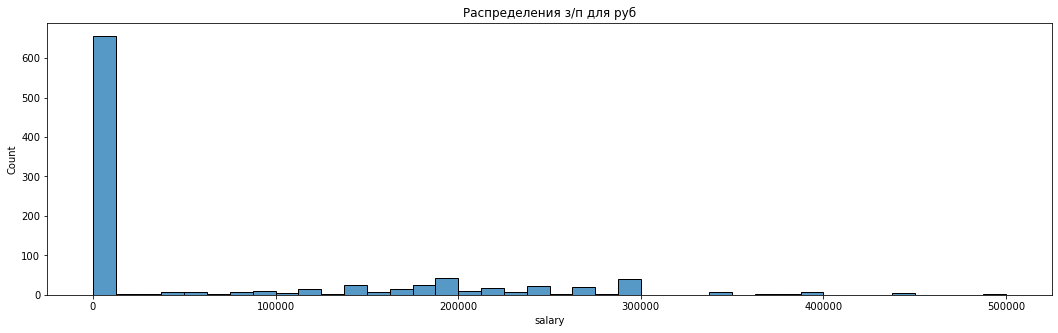

In [41]:
plt.figure(figsize = (18,5))
sns.histplot(telegram[(telegram['salary'] != -1) & (telegram['rub'])]['salary'], bins=40)
plt.title("Распределения з/п для руб")
plt.show()

Будем считать всё, что больше 15000 выражено в рублях.
Видим много данных около 0. 

Смотрим ближе

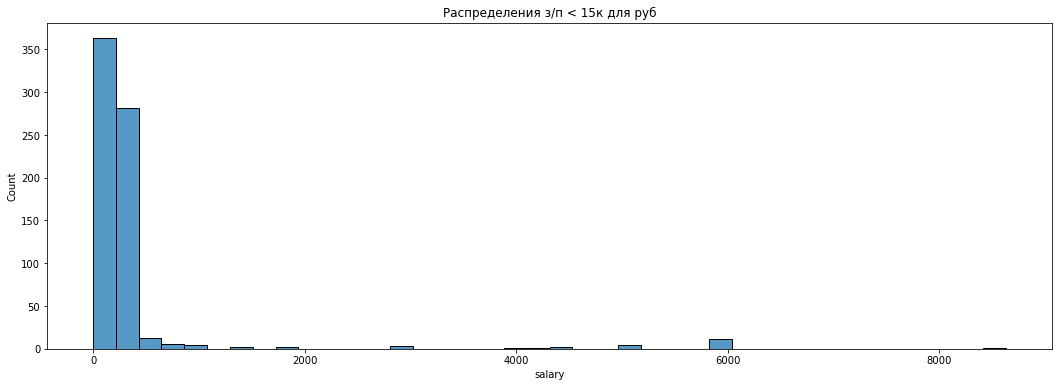

In [42]:
plt.figure(figsize = (18,6))
sns.histplot(telegram[(telegram['salary'] < 15000) & (telegram['rub'])]['salary'], bins=40)
plt.title("Распределения з/п < 15к для руб")
plt.show()

Сомнительно что з/п могли выразить как : <<3000 т.р>>

Посомтрим на вакансии через удобную кнопку

In [43]:
# кнопка для просмотра всех вакансий
button = widgets.Button(description = "Показать")
output = widgets.Output()
data = telegram[(telegram['salary'] > 1000) & (telegram['salary'] < 15000) & (telegram['rub'])]
display(button, output)
counter = 0
def on_click(b):
    with output:
        try:
            global counter
            clear_output()
            print('№ вакансии: ',counter)
            print(data.reset_index(drop=True)['text'][counter])            
            counter += 1
        except Exception as e:
            print('Вакансии кончились')

button.on_click(on_click)

Button(description='Показать', style=ButtonStyle())

Output()

Видим что от 1000 до 15000 руб это ставки за час (1,5 часа). Добавим эту информацию в таблицу.

З/п менее 1000 будем считать выраженной в тыс.руб

In [44]:
# True если почасовая оплата
telegram['hour_rate'] = (telegram['salary'] < 15000)&(telegram['salary'] > 1000)

# переводим тыс.руб в руб
telegram.loc[(telegram['rub']) & (telegram['salary'] < 1000)& (telegram['salary'] > 0), 'salary'] = \
    telegram[(telegram['rub']) & (telegram['salary'] < 1000)& (telegram['salary'] > 0)]['salary']*1000

In [45]:
print("Вакансий с почасовой оплатой = " , telegram['hour_rate'].sum())

Вакансий с почасовой оплатой =  93


**USD**

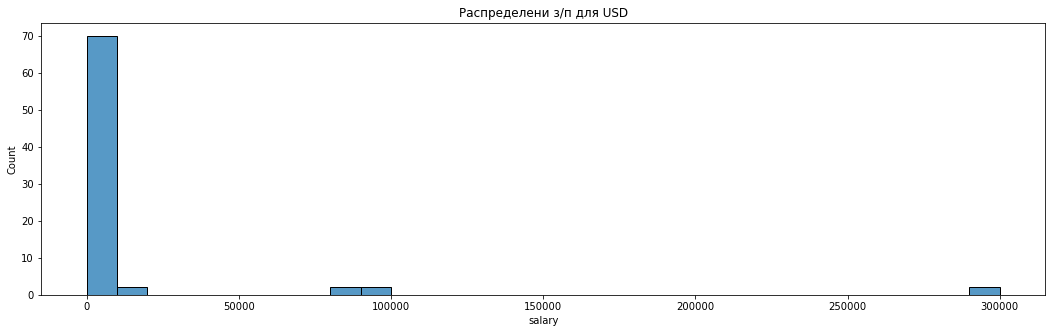

In [46]:
plt.figure(figsize = (18,5))
sns.histplot(telegram[(telegram['salary'] != -1) & (telegram['dol'])]['salary'], bins=30)
plt.title("Распределени з/п для USD")
plt.show()

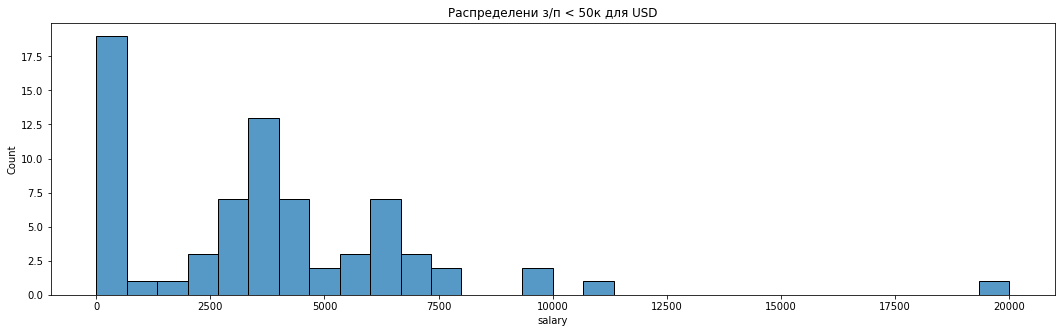

In [47]:
plt.figure(figsize = (18,5))
sns.histplot(telegram[(telegram['salary']< 50000) &(telegram['salary'] != -1) & (telegram['dol'])]['salary'], bins=30)
plt.title("Распределени з/п < 50к для USD")
plt.show()

In [48]:
len(telegram[(telegram['salary'] > 17500) & (telegram['dol'])]['text'])

7

У нас всего 7 вакансий с "з/п" более чем 17500, скорее всего это выбросы, которые нам не удалось правильно обработать. Поставим на них заглушки

In [49]:
telegram.loc[(telegram['salary'] > 17500)& (telegram['dol']),'salary'] = -1

**EUR**

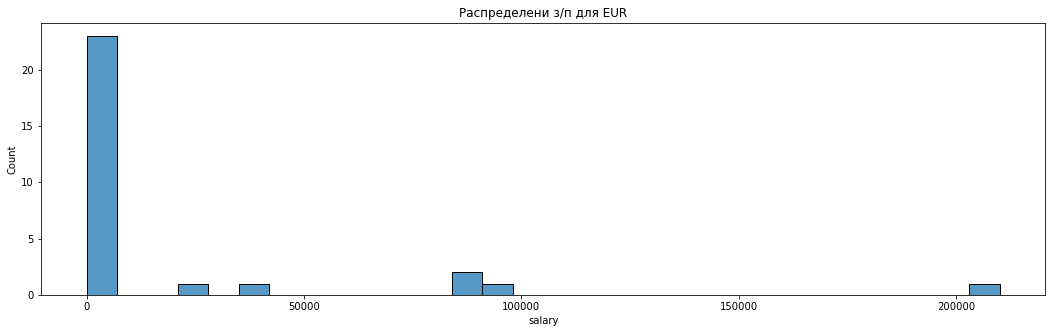

In [50]:
plt.figure(figsize = (18,5))
sns.histplot(telegram[(telegram['salary'] != -1) & (telegram['eur'])]['salary'], bins=30)
plt.title("Распределени з/п для EUR")
plt.show()

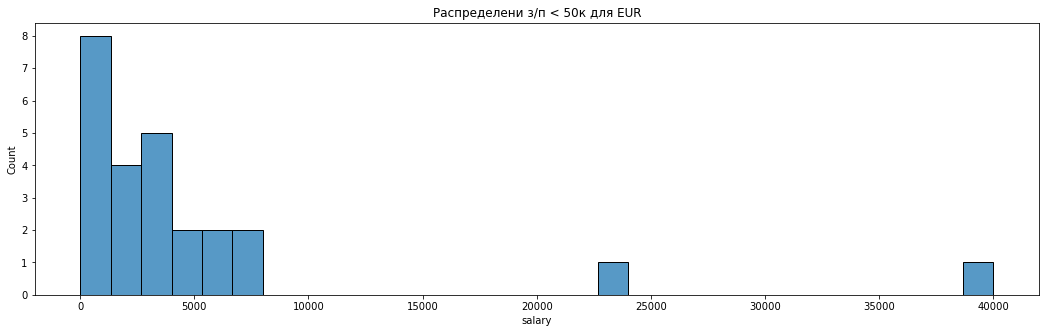

In [51]:
plt.figure(figsize = (18,5))
sns.histplot(telegram[(telegram['salary'] < 50000) & (telegram['salary'] != -1) & (telegram['eur'])]['salary'], bins=30)
plt.title("Распределени з/п < 50к для EUR")
plt.show()

In [52]:
# аналогично ставим заглушку
telegram.loc[(telegram['salary'] != -1) & (telegram['eur']) & (telegram['salary'] > 10000), 'salary'] = -1

# Что мы получили

В результате имеем датафрейм с данными с 1 января 2022 года.

Достали информацию по :

* Позиции (da / ds ...)

* grade (junior, middle ...)

* Готовы ли брать студентов 

* формат работы 

* ЗП (размер, валюта, почасовая ли оплата)

* Город

# Визуализация

## Смотрим на динамику показателей во времени

* количество вакансий в разрезе по позициям и grade


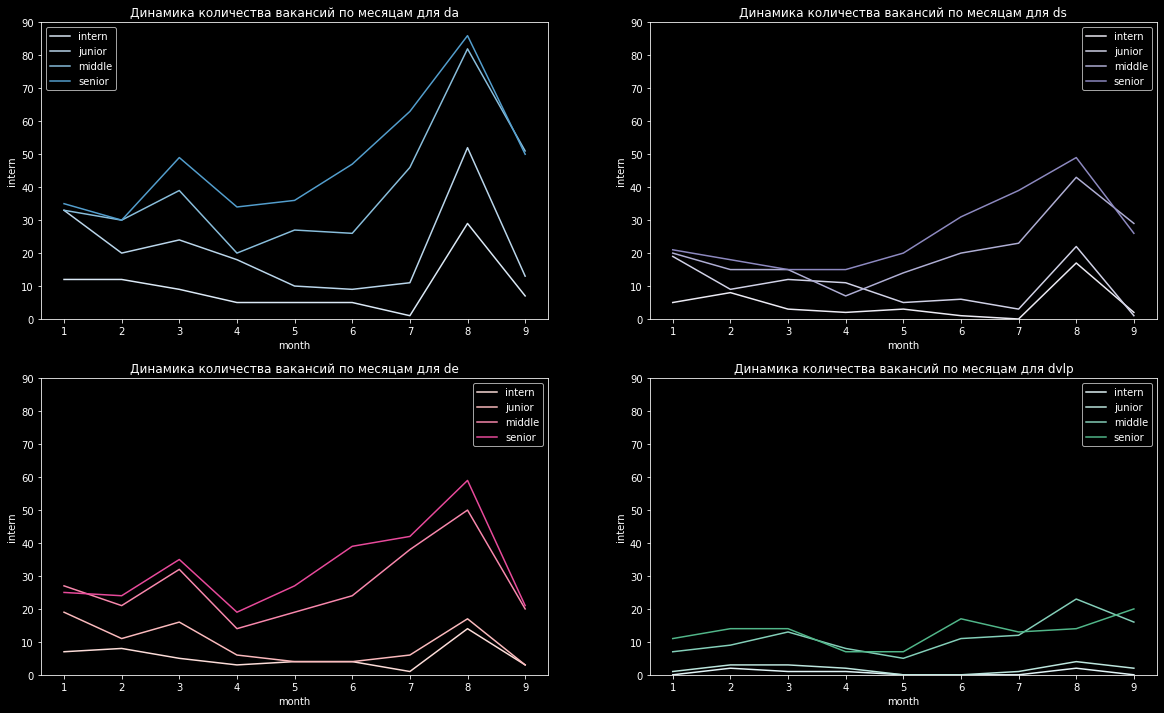

In [53]:
plt.style.use("dark_background")
telegram['month'] = telegram['date'].dt.month

palettes = ["Blues", 'Purples', 'RdPu', 'BuGn']
plt.figure(figsize = (20,12))
for i, pos in enumerate(['da', 'ds', 'de', 'dvlp']):
    data = telegram[['month', 'intern','junior', 'middle', 'senior', 'da', 'ds', 'de', 'dvlp']][telegram[pos]].groupby('month').agg({
        'intern' : sum,
        'junior' : sum,
        'middle' : sum,
        'senior' : sum
    }).reset_index().sort_values('month')
    

    sns.set_palette(palettes[i])
    ax = plt.subplot(2,2,i+1)
    sns.lineplot(data = data, x = 'month', y =  'intern', ax = ax)
    sns.lineplot(data = data, x = 'month', y =  'junior', ax = ax)
    sns.lineplot(data = data, x = 'month', y =  'middle', ax = ax)
    sns.lineplot(data = data, x = 'month', y =  'senior', ax = ax)
    plt.ylim(0, 90)
    plt.title("Динамика количества вакансий по месяцам для "+  pos)
    plt.legend(['intern', 'junior' ,'middle','senior'])


* Видим рорст количества вакансий для всех направлений и уровней в августе

* больше всего вакансий для аналитиков и инженеров, меньше всего для разработчиков

* Посмотрим на динамику з/п в разрезе по позиции и грейду. Не будем смотреть посчасовые ставки.

**пунктиром отделены месяца с января по конец сентября**

*по каждому grad'у у нас есть выбросы в з/п, будем чистить по перцентилям*


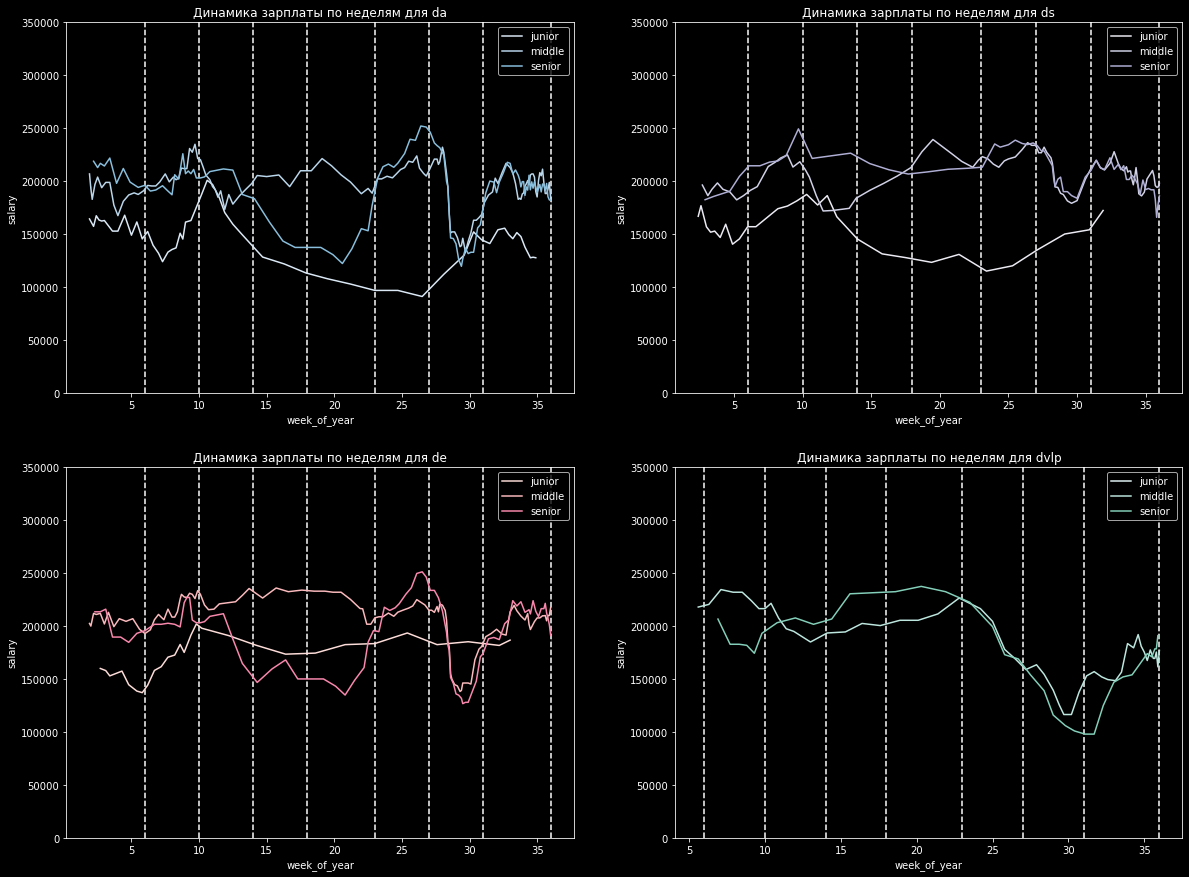

In [54]:
telegram['week_of_year'] = telegram['date'].dt.isocalendar().week
need_cols = ['intern','junior', 'middle', 'senior', 'da', 'ds', 'de', 'dvlp', 'salary', 'rub', \
             'hour_rate', 'month', 'date', 'week_of_year']
telegram['salary'] = telegram['salary'].astype(float)
plt.figure(figsize = (20,15))

# будем считать скользящее среднее и отсекать по заданному перцентилю
def get_data_gr_rolling(data, grade, percent):
    
    perc = np.percentile(data['salary'], percent)
    data = data[data['salary'] < perc]
    return data[data[grade]].sort_values('week_of_year')[['week_of_year', 'salary', 'month']].rolling(10).mean()
    
    
for i, pos in enumerate(['da', 'ds', 'de', 'dvlp']):
    
    sns.set_palette(palettes[i])
    data = telegram[(~telegram['hour_rate']) & (telegram['salary'] != -1) & (telegram['rub']) & (telegram[pos])][need_cols]
    ax = plt.subplot(2,2,i+1)
    sns.lineplot(data = get_data_gr_rolling(data, 'intern', 80), x = 'week_of_year', y = 'salary', ax = ax, label= 'intern')
    sns.lineplot(data = get_data_gr_rolling(data, 'junior', 80), x = 'week_of_year', y = 'salary', ax = ax, label='junior')
    sns.lineplot(data = get_data_gr_rolling(data, 'middle', 80), x = 'week_of_year', y = 'salary', ax = ax, label='middle')
    sns.lineplot(data = get_data_gr_rolling(data, 'senior', 80), x = 'week_of_year', y = 'salary', ax = ax, label='senior')
    
    
    plt.ylim(0, 350000)
    plt.title("Динамика зарплаты по неделям для "+  pos)
    #plt.legend(['intern', 'junior' ,'middle','senior'], loc = 'upper left')
    plt.legend()
    plt.vlines([6, 10, 14, 18, 23, 27, 31, 36], 0, 350000, linestyles ="dashed")

* в июле видим снижение з/п для всех напрвлений  middle / senior

* на джуновских позициях больше остальных зарабатывают инженеры

* после февраля 2022 снижение з/п для джунов

## Смотрим на соотношения

* формат работы (для grade'ов)


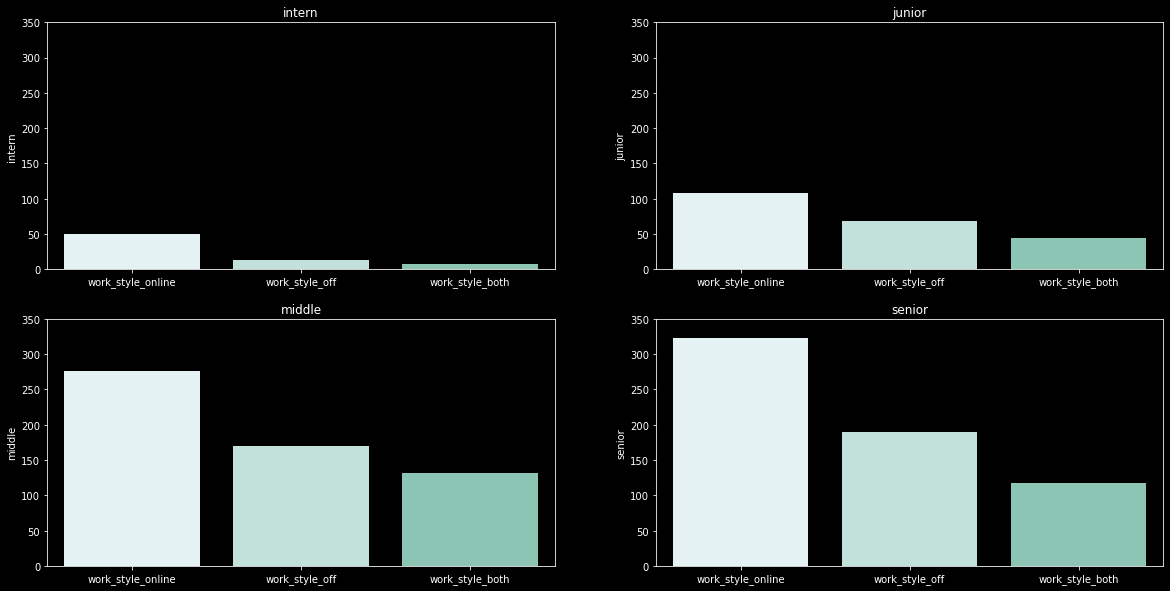

In [55]:
def get_barplot(grade, data):
    res = pd.DataFrame(data[data[grade]][['work_style_online', 'work_style_off', 'work_style_both']].sum())
    res.columns = [grade]
    plot = sns.barplot(y = res[grade], x = ['work_style_online', 'work_style_off', 'work_style_both'])
    return plot
     
 
plt.figure(figsize=(20,10))
for i, grade in enumerate(['intern','junior', 'middle', 'senior']):
    plt.subplot(2,2, i+1)
    plt.ylim(0, 350)
    get_barplot(grade, telegram)
    plt.title(grade)



* Видим что везде преобладает режим работы онлайн или гибрид, но у джуновской позиции доля таких вакансий меньше ( предпочтительнее видеть джуна в офисе )

* Посмотрим какая доля работодателей готова брать недавних выпускников или студентов

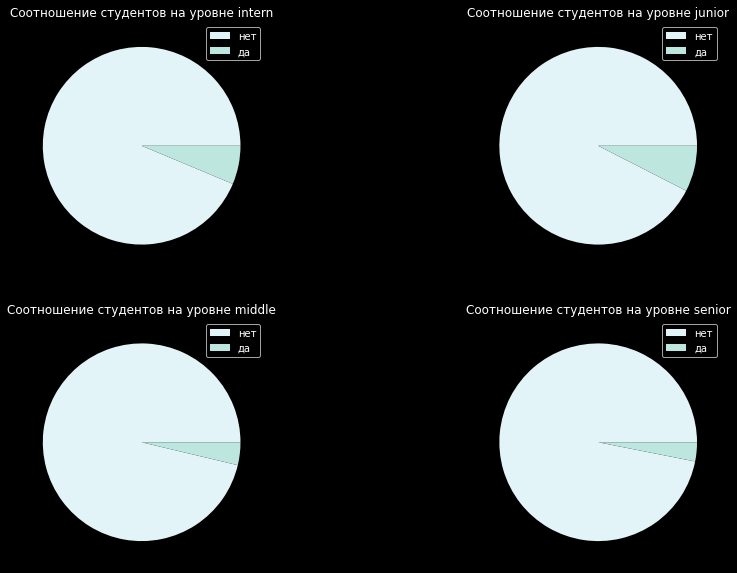

In [56]:
plt.figure(figsize=(15,10))
for i, grade in enumerate(['intern','junior', 'middle', 'senior']):
    plt.subplot(2,2, i+1)
    plt.pie(telegram[telegram[grade]]['is_student'].value_counts())
    plt.title("Соотношение студентов на уровне "+ grade)
    plt.legend(['нет', 'да'])


ожидаемо больше всего студентов берут на junior позиции

**Города - лидеры по количеству вакансий**   


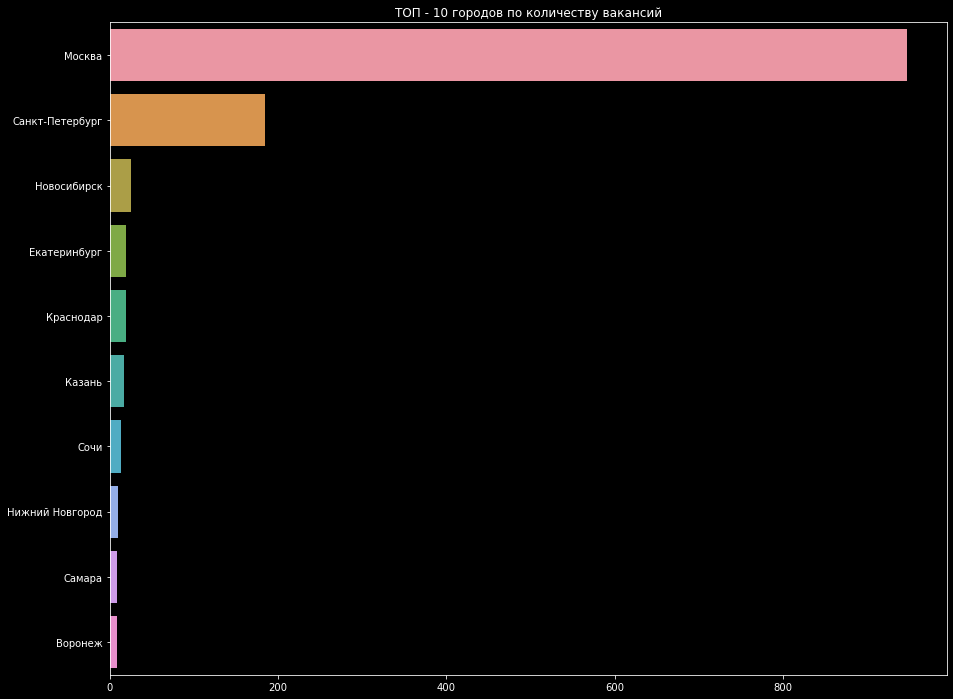

In [70]:
plt.figure(figsize=(15,12))
kl =  telegram[[*russia_cities.keys()]].sum().sort_values(ascending = False).head(10)
sns.barplot(x =kl.values, y = kl.index)
plt.title("ТОП - 10 городов по количеству вакансий")
plt.show()

* лидерами ожидаемо являются Москва и Питер

* на 3 и 4 месте Новосибирск и Екатерибург

Посмтрим среднюю з/п в Москве и Санкт - Петербурге для разных позиций


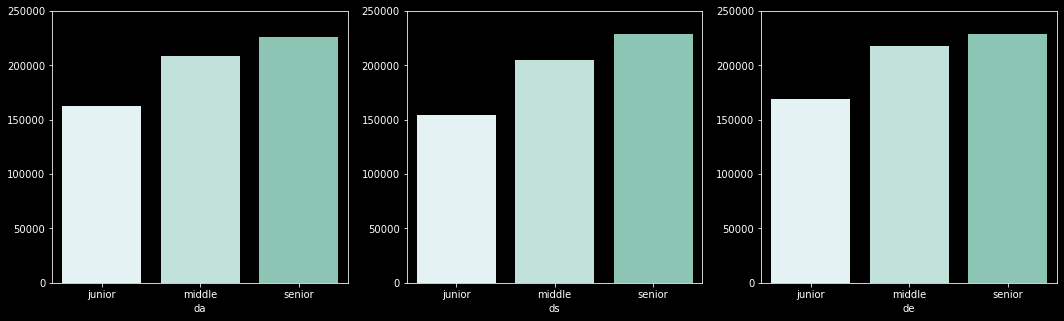

In [58]:
need_cols = need_cols + ['Москва', 'Санкт-Петербург']
kl = pd.DataFrame(data={'grade' : ['junior', 'middle', 'senior'],
                        'da' : [0]*3, 
                        'de' : [0]*3,
                        'ds' : [0]*3,
                        })
    
df = telegram[(telegram['Москва']) & (~telegram['hour_rate']) & (telegram['salary'] != -1) & (telegram['rub'])]
plt.figure(figsize = (18,5))
for i, pos in enumerate(['da', 'ds', 'de']):   
    for grade in ['junior', 'middle', 'senior']:
        kl.loc[kl['grade'] == grade, pos] = get_data_gr_rolling(df[(df[pos]) & (df[grade])], grade, 85)['salary'].mean()    
    # для всех грейдов заполнили da
    plt.subplot(1,3, i+1)
    plt.ylim(0, 250000)
    sns.barplot(x = kl['grade'], y = kl[pos])
    plt.xlabel(pos)
    plt.ylabel('')

* везде джуны получают меньше, а потолок по з/п среди миддлов пробивают аналитики и инженеры

Посмотрим доли других признаков (валюта, релокация, почасовая ли оплата)в общем количестве вакансий 

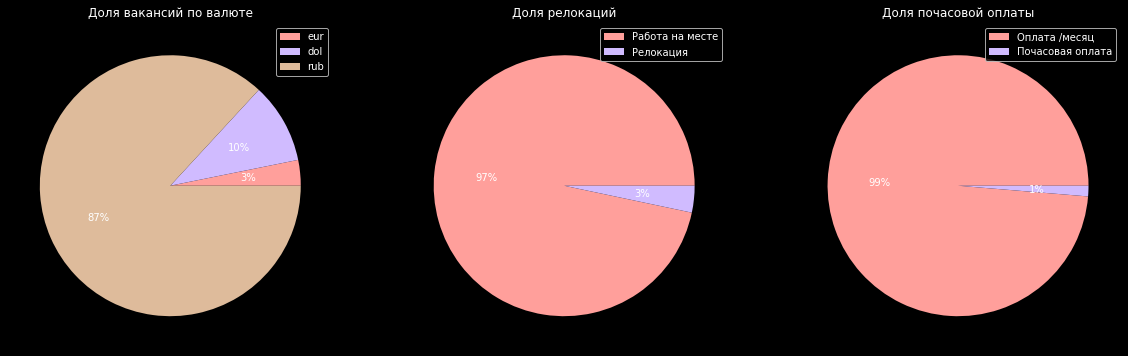

In [59]:
plt.figure(figsize = (20,6))
colors = sns.color_palette('pastel')[3:7]
plt.subplot(1, 3, 1)
plt.pie(telegram[['eur', 'dol', 'rub']].sum(),colors=colors, autopct='%.0f%%')
plt.legend(labels=['eur', 'dol', 'rub'])
plt.title("Доля вакансий по валюте")


plt.subplot(1, 3, 2)
plt.pie(telegram['relocation'].value_counts(), autopct='%.0f%%', colors=colors)
plt.legend(labels=['Работа на месте', 'Релокация'])
plt.title("Доля релокаций")


plt.subplot(1, 3, 3)
plt.pie(telegram['hour_rate'].value_counts(), autopct='%.0f%%', colors=colors)
plt.legend(labels=['Оплата /месяц', 'Почасовая оплата'])
plt.title("Доля почасовой оплаты")
plt.show()

# Общий вывод

Для каждой гипотезы волучили ответ:

 
- Для позиций Junior / Intern работодатель отдаёт предпочтение студенту или недавнему выпускнику (сравнить количество вакансий)

`Нет. Но доля студентов / выпускников больше всего на Junior - позициях`


- Работодатели больше всего ищут на Jinior - позицию, чем на Middle

`Нет. Больше всего вакансий на Senior / Middle, на джунов и стажёров спрос меньше `

- больше вакансий с удалённой работой / гибридом

`Да. Везде преобладает режим работы онлайн или гибрид, но у джуновской позиции доля таких вакансий меньше ( предпочтительнее видеть джуна в офисе )`


Также:

    * релокацию предлагают в 3% вакансий 

По количеству вакансий:

    * Видим рост количества вакансий для всех направлений и уровней в августе

    * больше всего вакансий для аналитиков и инженеров, меньше всего для разработчиков
    
    * лидерами ожидаемо являются Москва и Питер, на 3 и 4 месте Новосибирск и Екатерибург

По з/п:

* после февраля 2022 снижение з/п для джунов

* в июле видим снижение з/п для всех напрвлений  middle / senior ( для джунов либо рост либо без изменений )

* на джуновских позициях больше остальных зарабатывают инженеры

* везде джуны получают меньше, а потолок по з/п среди миддлов пробивают аналитики и инженеры

* для 13% вакансий з/п не в рублях. (10% приходится на USD )

* почасовая оплата ( = вакансия для преподавателя) в 1% вакансий



# Обработка данных для дашборда

In [112]:
telegram.columns

Index(['chat', 'message_id', 'date', 'text', 'entities', 'chat_id',
       'chat_name', 'username', 'url', 'parsed_text_from_link', 'intern',
       'junior', 'middle', 'senior', 'da', 'ds', 'de', 'dvlp', 'is_student',
       'work_style_online', 'work_style_off', 'work_style_both', 'relocation',
       'Москва', 'Санкт-Петербург', 'Казань', 'Сочи', 'Ростов', 'Калининград',
       'Самара', 'Екатеринбург', 'Нижний Новгород', 'Краснодар', 'Иркутск',
       'Ярославль', 'Владивосток', 'Воронеж', 'Петрозаводск', 'Тюмень', 'Уфа',
       'Красноярск', 'Волгоград', 'Новосибирск', 'Новороссийск',
       'Великий Новгород', 'Псков', 'Саратов', 'clean_text', 'salary', 'eur',
       'dol', 'rub', 'hour_rate', 'month', 'week_of_year', 'city'],
      dtype='object')

In [127]:
city_cols = ['Москва', 'Санкт-Петербург', 'Казань', 'Сочи', 'Ростов', 'Калининград',
       'Самара', 'Екатеринбург', 'Нижний Новгород', 'Краснодар', 'Иркутск',
       'Ярославль', 'Владивосток', 'Воронеж', 'Петрозаводск', 'Тюмень', 'Уфа',
       'Красноярск', 'Волгоград', 'Новосибирск', 'Новороссийск',
       'Великий Новгород', 'Псков', 'Саратов']

grade_cols = ['intern', 'junior', 'middle', 'senior']

position_cols = ['da', 'ds', 'de', 'dvlp']

work_style_cols = ['work_style_online', 'work_style_off', 'work_style_both']

currency_cols = ['eur', 'dol', 'rub']


def append_categorical_cols(telegram, column_new_name, cols ):
    telegram[column_new_name] = ''
    for col in cols:
        telegram[column_new_name] += [x*col+','  if (x*col != '')  else ''  for x in telegram[col]]
    telegram[column_new_name] = telegram[column_new_name].apply(lambda x : x[:-1])
    return telegram
    
telegram = append_categorical_cols(telegram, 'city', city_cols)
telegram = append_categorical_cols(telegram, 'grade', grade_cols)
telegram = append_categorical_cols(telegram, 'position', position_cols)
telegram = append_categorical_cols(telegram, 'work_style', work_style_cols)
telegram = append_categorical_cols(telegram, 'currency', currency_cols)


In [131]:
telegram.to_csv('C:/Users/79509/Documents/pet_pr/parser/telegram_final_data.csv')